# End-to-end Machine Learning project

Dataset: California Housing Prices

Tasks: execute an end-to-end machine learning pipeline and apply regression algorithms

**1. Define the problem**

a. Frame the problem


District pricing: prediction of a district’s median house price

Investment decision: a worth investing area

b. Select a performance measure

Root Mean Square Error

c. Check assumptions

Inputs and outputs of components

**2. Get the Data**

a. Download the data and Load data file: housing.csv

In [3]:
import pandas as pd

file_name = "housing.csv"

df_housing = pd.read_csv(file_name)

b. Take a quick look at the data:

Hints: pandas, matplotlib.pyplot, head(), info(), value_counts(), describe(), %matplotlib inline, hist(), show()

In [4]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df_housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


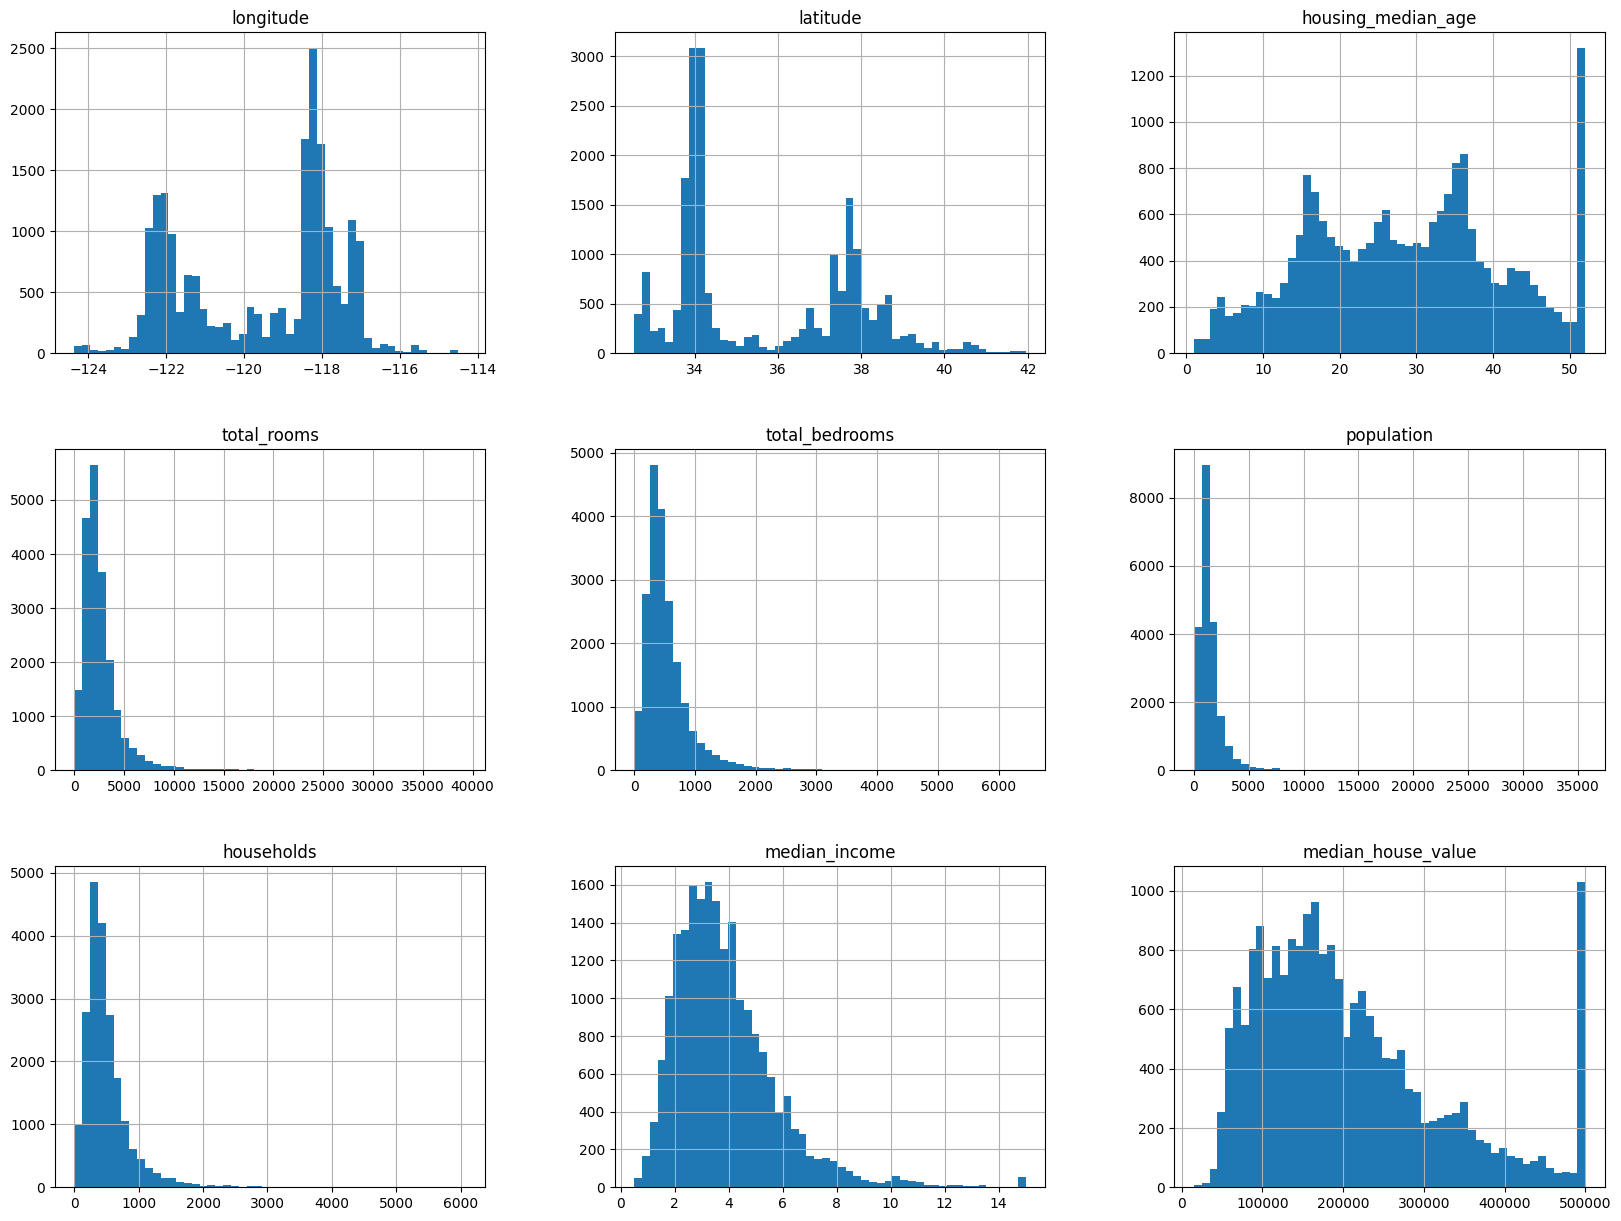

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
df_housing.hist(bins=50, figsize=(20,15))
plt.show()

Observations:

The median is not really in USD but instead, it is scaled and capped at 15 for higher median and 0.5 for lower median incomes, You should probably enquire about this with the team collecting the data because it is important to understand what the data looks like.

The median age and the median house are also capped, median age should not be a problem but median house value should be a problem because this is the output we need to confirm with the client team whether this is ok or they need values beyond $500k If this is an issue either we have to collect proper labels or remove those districts from the training set.

Most of the histograms are tail-heavy they extend much farther to the right of the median than to the left. Ideally we are looking for a bell-shaped distribution.

**c. Create a test set:**

Hints: numpy, sklearn.model_selection, cut(), train_test_split(), StratifiedShuffleSplit()

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [10]:
print("train_set", len(train_set))
print("test_set", len(test_set))

train_set 16512
test_set 4128


In [11]:
import numpy as np

df_housing["income_cat"] = pd.cut(df_housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_housing, df_housing["income_cat"]):
    strat_train_set = df_housing.loc[train_index]
    strat_test_set = df_housing.loc[test_index]

In [13]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

**3. Explore the Data**

a. Visualize the data:
Hints: plot()

<Axes: >

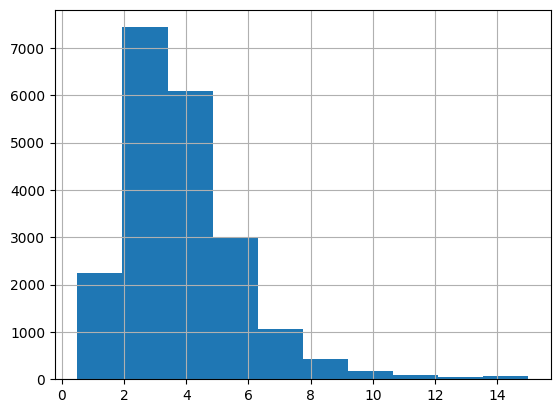

In [14]:
df_housing['median_income'].hist()

In [15]:
df_housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

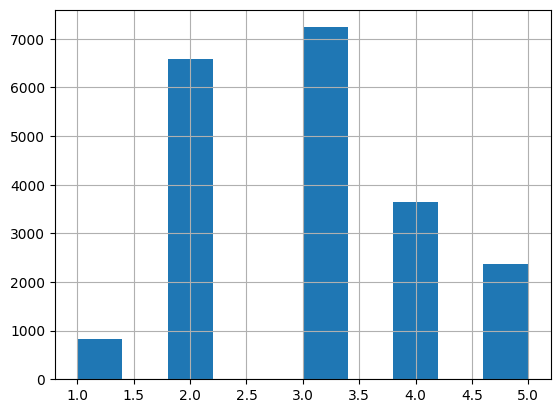

In [16]:
df_housing["income_cat"].hist()

In [17]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df_housing, test_size=0.2, random_state=42)
compare_proportions = pd.DataFrame({
    "Overall": income_cat_proportions(df_housing),
    "Stratified": income_cat_proportions(strat_train_set),
    "Random": income_cat_proportions(train_set),
}).sort_index()
compare_proportions["Rand. %error"] = 100 * compare_proportions["Random"] / compare_proportions["Overall"] - 100
compare_proportions["Strat. %error"] = 100 * compare_proportions["Stratified"] / compare_proportions["Overall"] - 100
compare_proportions

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039789,0.039729,-0.243309,-0.091241
2,0.318847,0.318859,0.317466,-0.433065,0.003799
3,0.350581,0.350594,0.348595,-0.566611,0.003455
4,0.176308,0.176296,0.178537,1.264084,-0.006870
5,0.114438,0.114462,0.115673,1.079594,0.021169


In [18]:
for set_in in (strat_train_set, strat_test_set):
    set_in.drop("income_cat", axis=1, inplace=True)

b. Look for correlations

Hints: pandas.plotting, corr(), scatter_matrix()

In [19]:
housing = strat_train_set.copy()

In [20]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_income"].sort_values(ascending=False)

median_income         1.000000
median_house_value    0.687151
total_rooms           0.200133
households            0.010869
population            0.002421
total_bedrooms       -0.009643
longitude            -0.019615
latitude             -0.075146
housing_median_age   -0.111315
Name: median_income, dtype: float64

The bedrooms_per_room is more correlated to the median_house_value than the total_rooms. The number of rooms per household also seems to be more informative because the bigger the house the more expensive it is.

<Axes: xlabel='longitude', ylabel='latitude'>

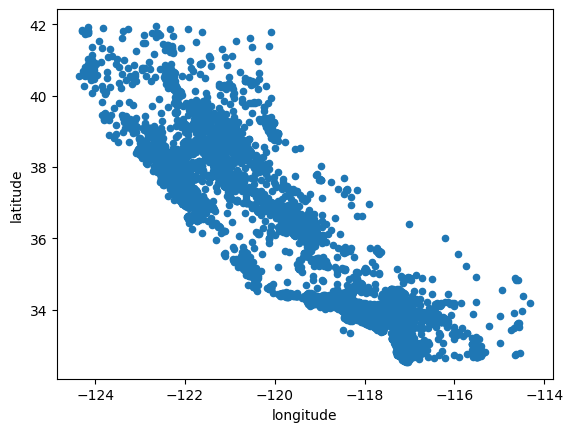

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

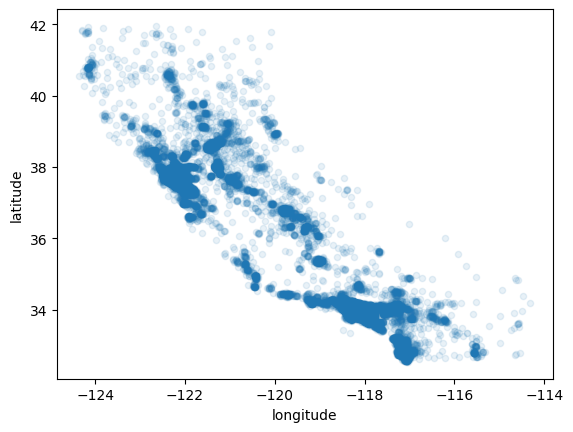

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

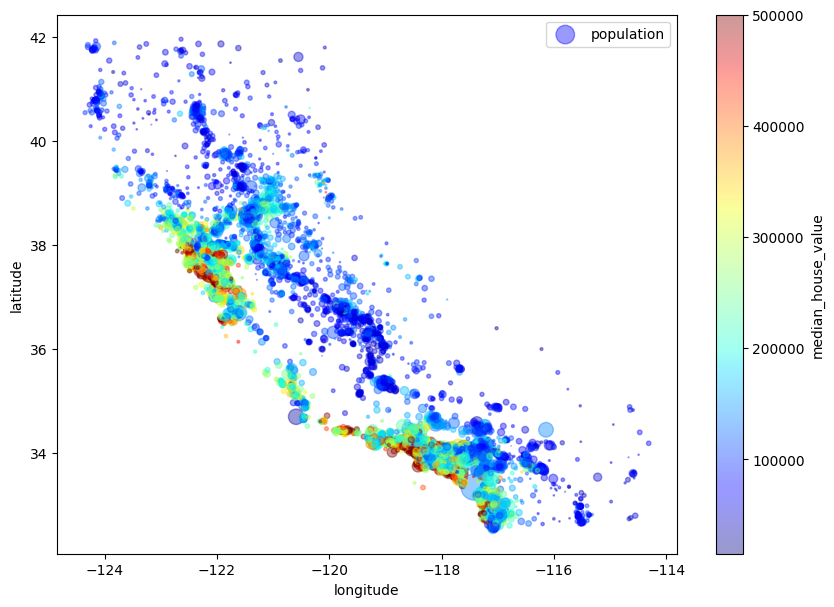

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

Another way to check for a correlation is to use the pandas scatter_matrix function which plots every numerical attribute against every other so since we have 11 attributes we will get 11*11 results which is not that useful so lets just take a look at the important once.

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

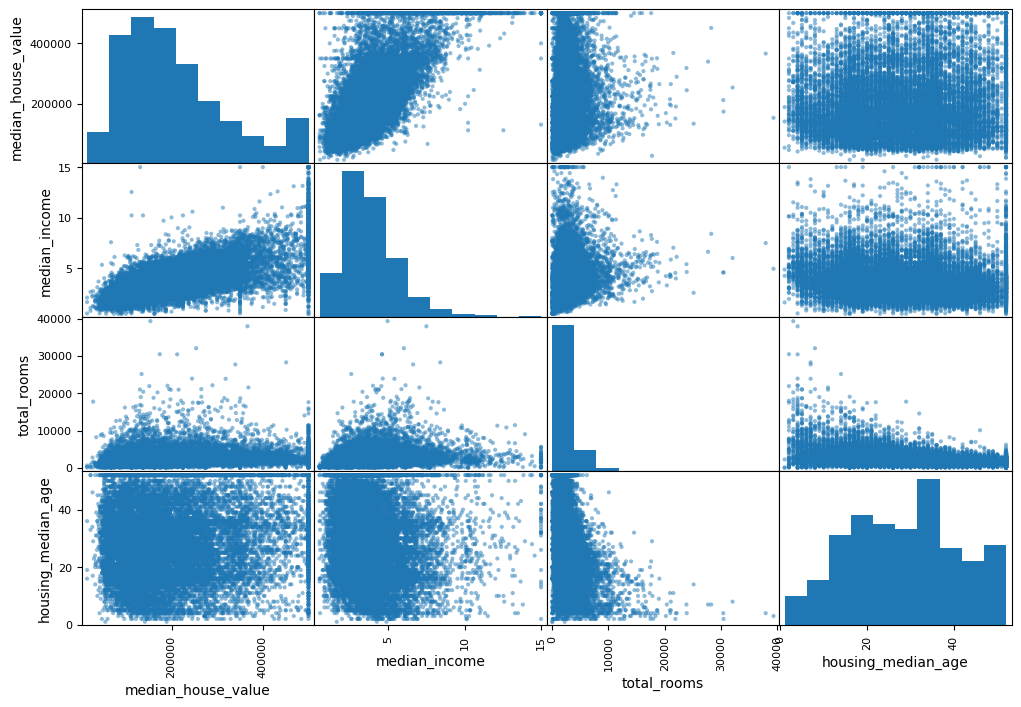

In [24]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

Median income looks like the most promising attribute so let's zoom in on that a little bit.

(0.0, 16.0, 0.0, 550000.0)

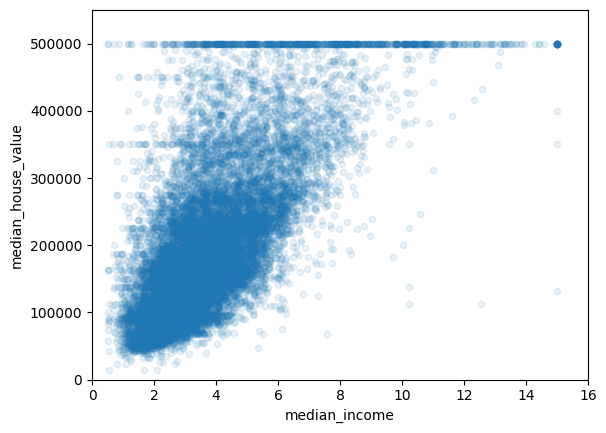

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

plt.axis([0, 16, 0, 550000])

c. Combine attributes:

Create new features by combining existing ones (e.g., "rooms_per_household," "bedrooms_per_room," "population_per_household").

In [26]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

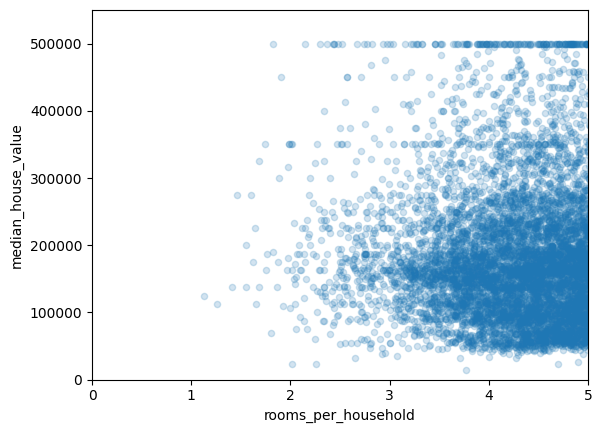

In [27]:
housing.plot (kind="scatter", x="rooms_per_household", y="median_house_value",alpha=0.2)
plt.axis([0,5,0, 550000])
plt.show()

In [28]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


`The correlation is strong and we can see an upward trend and as we suspected a straight line at $500k but to our surprise, there are some other straight lines as well around $450k, $350k, $280k and so on. We might have to remove this to prevent the model from learning to reproduce these skewed patterns.`





**4. Prepare the Data**

a. Handle missing values:

Hints: sklearn.impute, SimpleImputer()

In [29]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop lalels for tranining set
housing_labels = strat_train_set["median_house_value"].copy()

In [30]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [31]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [32]:
sample_incomplete_rows.drop("total_bedrooms", axis=1) # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [33]:
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

/var/folders/gs/8r9d7z0j3v34npp1y6f19bnw0000gp/T/ipykernel_33363/2198282036.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


In [36]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Remove text attribute

In [38]:
housing_num = housing.drop("ocean_proximity", axis=1)


In [39]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [41]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [42]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [43]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [44]:
imputer.strategy

'median'

In [45]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [46]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


b. Handle text and categories

Hints: sklearn.preprocessing, OrdinalEncoder(), OneHotEncoder()

In [47]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [48]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded [:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [49]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [50]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [51]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [52]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

c. Custom transformations:

Create a custom transformer class for specific feature engineering tasks.

Hints: sklearn.base, BaseEstimator(), TransformerMixin()

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin


In [54]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, 3] / X[:, 6] # or housing[row_index, "total_rooms"]/housing[row_index, "households"]
        population_per_household = X[:, 5] / X[:, 6] # or housing[row_index, "population"]/housing[row_index, "households"]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3] # or housing[row_index, "total_bedrooms"]/housing[row_index, "total_rooms"]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [55]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

recover dataframe, collum names of "housing_extra_attribts"

In [56]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


d. Feature scaling:

Hints: sklearn.preprocessing, StandardScaler()

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_num_tr = scaler.fit_transform(housing_num)

In [58]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

e. Transformation pipeline:

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [60]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [61]:
housing_prepared.shape

(16512, 13)

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [63]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

old_cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse_output=False)),
])

In [64]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion([
    ("num_pipeline", old_num_pipeline),
    ("cat_pipeline", old_cat_pipeline),
])

In [65]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [66]:
np.allclose(housing_prepared, old_housing_prepared)

True

**5. Select and Train a Model**

a. Training and evaluating on the training set:

Hints: sklearn.linear_model, sklearn.tree, sklearn.ensemble, sklearn.metrics, LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), mean_squared_error

In [67]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [68]:
#try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 88983.14806384 305351.35385026 153334.71183453 184302.55162102
 246840.18988841]


In [69]:
#Compare against the actual values:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [70]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 0.43743108, -0.63581817, -0.13148926,  0.42717947,  0.27279028,
         0.37406031,  0.22089846,  0.32575178,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [71]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69050.56219504567

In [72]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49905.32944271533

In [73]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [74]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

b. Better evaluation using cross-validation:

Hints: sklearn.model_selection, cross_val_score()

In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) # calculate RMSE scores for decision tree model

In [76]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [77]:
display_scores (tree_rmse_scores)

Scores: [72229.03469752 65318.2240289  67706.39604745 69368.53738998
 66767.61061621 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.31946074]
Mean: 69204.32275494766
Standard deviation: 2372.0707910559163


In [78]:
line_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-line_scores)
display_scores(lin_rmse_scores)

Scores: [72229.03469752 65318.2240289  67706.39604745 69368.53738998
 66767.61061621 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.31946074]
Mean: 69204.32275494766
Standard deviation: 2372.0707910559163


In [79]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42) #Change default n_estimators in RandomForest
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [80]:
housing_predictions = forest_reg.predict (housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18342.366362322846

In [81]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51039.08053738 48741.94041426 45940.42771745 50501.41453432
 47387.7896427  49595.25845731 51625.68567717 48865.70709952
 47322.87631489 53301.08748462]
Mean: 49432.12678796127
Standard deviation: 2124.8587921578355


In [82]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69204.322755
std       2500.382157
min      65318.224029
25%      67124.346106
50%      69404.658178
75%      70697.800632
max      73003.752739
dtype: float64

In [83]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111802.67909771342

**6. Fine-tune the Model**

a. Grid search:

Hints: sklearn.model_selection, GridSearchCV()

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2x3) combinations with bootstrap=False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# Use forest_reg (RandomForestRegressor) instead of lin_reg (LinearRegression)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [85]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [86]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [87]:
cvres = grid_search.cv_results_
for mean_score, std_score, params in zip(cvres["mean_test_score"],
                                         cvres["std_test_score"],
                                         cvres["params"]):
    print(np.sqrt(-mean_score), std_score, params)

63743.43084091899 68194127.47830419 {'max_features': 2, 'n_estimators': 3}
55023.919331085264 100585733.51799423 {'max_features': 2, 'n_estimators': 10}
52672.61048954053 111086228.82200593 {'max_features': 2, 'n_estimators': 30}
60299.48845134689 216019643.6140911 {'max_features': 4, 'n_estimators': 3}
53106.41271952157 135455282.85648736 {'max_features': 4, 'n_estimators': 10}
50396.32971134071 109781670.81568106 {'max_features': 4, 'n_estimators': 30}
58363.22748437211 65237423.77999267 {'max_features': 6, 'n_estimators': 3}
52446.057900340325 68858838.93901142 {'max_features': 6, 'n_estimators': 10}
50177.91173851986 78861741.43237896 {'max_features': 6, 'n_estimators': 30}
58058.12321723554 134150617.89118733 {'max_features': 8, 'n_estimators': 3}
51849.42681935635 62647064.832050726 {'max_features': 8, 'n_estimators': 10}
49941.11534754462 85330700.96133105 {'max_features': 8, 'n_estimators': 30}
62820.05402812565 157803664.13779223 {'bootstrap': False, 'max_features': 2, 'n_esti

In [88]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041094,0.003209,0.002425,0.000302,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.115539e+09,-4.091705e+09,...,-4.063225e+09,6.819413e+07,18,-1.151168e+09,-1.146269e+09,-1.145558e+09,-1.015517e+09,-1.125653e+09,-1.116833e+09,5.140659e+07
1,0.128384,0.003018,0.006903,0.000347,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.126794e+09,-2.849373e+09,...,-3.027632e+09,1.005857e+08,11,-5.921178e+08,-5.982933e+08,-5.811283e+08,-5.631148e+08,-5.910639e+08,-5.851436e+08,1.231254e+07
2,0.381691,0.009166,0.018966,0.000752,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.794411e+09,-2.589341e+09,...,-2.774404e+09,1.110862e+08,7,-4.413446e+08,-4.369587e+08,-4.290991e+08,-4.205161e+08,-4.330958e+08,-4.322028e+08,7.116190e+06
3,0.065841,0.003349,0.004609,0.004834,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.502836e+09,-3.339625e+09,...,-3.636028e+09,2.160196e+08,16,-9.856503e+08,-9.898189e+08,-9.808281e+08,-9.902819e+08,-1.013319e+09,-9.919796e+08,1.120112e+07
4,0.212976,0.004099,0.006481,0.000197,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.778760e+09,-2.614299e+09,...,-2.820291e+09,1.354553e+08,9,-5.276752e+08,-5.393865e+08,-5.306473e+08,-5.264948e+08,-5.517750e+08,-5.351957e+08,9.438121e+06
5,0.616622,0.010136,0.018553,0.000506,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.549366e+09,-2.349126e+09,...,-2.539790e+09,1.097817e+08,3,-4.027436e+08,-3.992266e+08,-3.933199e+08,-3.831531e+08,-3.974442e+08,-3.951775e+08,6.735219e+06
6,0.087847,0.002858,0.002236,0.000210,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.357326e+09,-3.362363e+09,...,-3.406266e+09,6.523742e+07,13,-8.517474e+08,-9.561176e+08,-9.038264e+08,-8.710601e+08,-9.324178e+08,-9.030339e+08,3.830027e+07
7,0.303460,0.021414,0.006625,0.000292,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.797362e+09,-2.656809e+09,...,-2.750589e+09,6.885884e+07,6,-4.993909e+08,-5.168243e+08,-5.007543e+08,-4.919507e+08,-5.240126e+08,-5.065866e+08,1.190360e+07
8,0.853251,0.003484,0.018610,0.000377,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.534328e+09,-2.396127e+09,...,-2.517823e+09,7.886174e+07,2,-3.782309e+08,-3.923535e+08,-3.808534e+08,-3.735470e+08,-3.870388e+08,-3.824047e+08,6.614228e+06
9,0.110781,0.000790,0.002142,0.000110,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.284690e+09,-3.149616e+09,...,-3.370746e+09,1.341506e+08,12,-8.710642e+08,-8.988644e+08,-9.096487e+08,-8.601465e+08,-8.511418e+08,-8.781731e+08,2.247234e+07


b. Randomized search:

Hints: sklearn.model_selection, RandomizedSearchCV()

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=80),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distribs, n_iter=10, cv=5,
                                scoring='neg_mean_squared_error',
                                return_train_score=True, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)
# ... (Similar to GridSearchCV but with RandomizedSearchCV)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x177398af0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x177394910>},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [90]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49974.077454737395 {'max_features': 52, 'n_estimators': 93}
49914.39799803922 {'max_features': 15, 'n_estimators': 107}
49756.351159674625 {'max_features': 72, 'n_estimators': 189}
49940.07802258135 {'max_features': 21, 'n_estimators': 103}
49981.47769129052 {'max_features': 75, 'n_estimators': 88}
49836.2401974617 {'max_features': 24, 'n_estimators': 131}
50273.23917067783 {'max_features': 22, 'n_estimators': 53}
51584.550325841294 {'max_features': 2, 'n_estimators': 88}
50421.444804411236 {'max_features': 30, 'n_estimators': 38}
51261.86458967318 {'max_features': 2, 'n_estimators': 192}


c. Ensemble methods:

Hints: sklearn.ensemble, RandomForestClassifier(), BaggingClassifier(), AdaBoostClassifier()


In [91]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor with desired hyperparameters
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
forest_reg.fit(housing_prepared, housing_labels)

# Evaluate the model
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest RMSE:", forest_rmse)

Random Forest RMSE: 18342.366362322846


In [92]:
from sklearn.ensemble import BaggingRegressor

# Create a Bagging Regressor
bagging_reg = BaggingRegressor(n_estimators=100, random_state=42)

# Fit the model
bagging_reg.fit(housing_prepared, housing_labels)

# Evaluate the model (similar to Random Forest)
# ...

BaggingRegressor(n_estimators=100, random_state=42)

In [93]:
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoost Regressor
adaboost_reg = AdaBoostRegressor(n_estimators=50, random_state=42)

# Fit the model
adaboost_reg.fit(housing_prepared, housing_labels)

# Evaluate the model (similar to Random Forest)
# ...

AdaBoostRegressor(random_state=42)

d. Analyze the best models:

EHints: sklearn.model_selection, scipy

In [94]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.05784555e-01, 9.77608475e-02, 5.05551584e-02, 3.04116971e-02,
       2.69356863e-02, 4.06259319e-02, 2.63850940e-02, 4.51422930e-01,
       1.04299655e-02, 1.53177272e-01, 1.56358159e-05, 1.59417083e-03,
       4.90105654e-03])

In [95]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4514229299024067, 'median_income'),
 (0.1531772715909896, 'pop_per_hhold'),
 (0.1057845546735567, 'longitude'),
 (0.09776084745397101, 'latitude'),
 (0.050555158353914685, 'housing_median_age'),
 (0.04062593190523443, 'population'),
 (0.03041169711846745, 'total_rooms'),
 (0.026935686293612923, 'total_bedrooms'),
 (0.02638509400288614, 'households'),
 (0.010429965515030306, 'rooms_per_hhold'),
 (0.004901056539401569, 'INLAND'),
 (0.0015941708346023545, '<1H OCEAN'),
 (1.5635815926181513e-05, 'bedrooms_per_room')]

e.	Evaluate the model on the test set

Hints: scipy, stats

In [96]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [97]:
final_rmse

47859.544319108194

In [98]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45909.04350565, 49733.6072416 ])

In [99]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45909.04350565146, 49733.60724159836)